In [1]:
import sys; print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


<h1> Connecting the Drive (Training Dataset)

In [2]:
from google.colab import drive
drive.mount ('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
import os

dataset_folder_path = "/content/gdrive/MyDrive/face-matchmaker-bollywood/data"

actors = os.listdir(dataset_folder_path); print(actors)

['Vaani_Kapoor', 'Tusshar_Kapoor', 'Yami_Gautam', 'Vivek_Oberoi', 'Vicky_Kaushal', 'Varun_Dhawan', 'Vidya_Balan', 'Zareen_Khan', 'Tiger_Shroff', 'Uday_Chopra', 'Sonam_Kapoor', 'Shruti_Haasan', 'Tamannaah_Bhatia', 'Sonakshi_Sinha', 'Suniel_Shetty', 'Sidharth_Malhotra', 'Tabu', 'Sunny_Deol', 'Taapsee_Pannu', 'Sushant_Singh_Rajput', 'Salman_Khan', 'Sara_Ali_Khan', 'Shah_Rukh_Khan', 'R_Madhavan', 'Shraddha_Kapoor', 'Shilpa_Shetty', 'Sanjay_Dutt', 'Saif_Ali_Khan', 'Shreyas_Talpade', 'Shahid_Kapoor', 'Prachi_Desai', 'Randeep_Hooda', 'Richa_Chadda', 'Priyanka_Chopra', 'Ranbir_Kapoor', 'Ranveer_Singh', 'Rani_Mukerji', 'Riteish_Deshmukh', 'Preity_Zinta', 'Rajkummar_Rao', 'Nushrat_Bharucha', 'Nargis_Fakhri', 'Parineeti_Chopra', 'Naseeruddin_Shah', 'Manoj_Bajpayee', 'Nana_Patekar', 'Paresh_Rawal', 'Mrunal_Thakur', 'Prabhas', 'Pooja_Hegde', 'Kriti_Kharbanda', 'Katrina_Kaif', 'Kriti_Sanon', 'Madhuri_Dixit', 'Karisma_Kapoor', 'Kareena_Kapoor', 'Lara_Dutta', 'Kartik_Aaryan', 'Kiara_Advani', 'Kunal_Kh

In [4]:
import pickle # serialising and deserialising

filenames = list()

for actor in actors:
  for file in os.listdir(os.path.join(dataset_folder_path, actor)):
    filenames.append(os.path.join(dataset_folder_path, actor, file))

pickle.dump (filenames, open('filenames.pkl', 'wb'))

print(filenames)

# this filenames.pkl file will be having the path of each and every file of each and every actor (means all the data's path in one file)
# and this filenames.pkl we will use for feature extraction later

['/content/gdrive/MyDrive/face-matchmaker-bollywood/data/Vaani_Kapoor/Vaani_Kapoor.117.jpg', '/content/gdrive/MyDrive/face-matchmaker-bollywood/data/Vaani_Kapoor/Vaani_Kapoor.127.jpg', '/content/gdrive/MyDrive/face-matchmaker-bollywood/data/Vaani_Kapoor/Vaani_Kapoor.102.jpg', '/content/gdrive/MyDrive/face-matchmaker-bollywood/data/Vaani_Kapoor/Vaani_Kapoor.122.jpg', '/content/gdrive/MyDrive/face-matchmaker-bollywood/data/Vaani_Kapoor/Vaani_Kapoor.106.jpg', '/content/gdrive/MyDrive/face-matchmaker-bollywood/data/Vaani_Kapoor/Vaani_Kapoor.114.jpg', '/content/gdrive/MyDrive/face-matchmaker-bollywood/data/Vaani_Kapoor/Vaani_Kapoor.105.jpg', '/content/gdrive/MyDrive/face-matchmaker-bollywood/data/Vaani_Kapoor/Vaani_Kapoor.118.jpg', '/content/gdrive/MyDrive/face-matchmaker-bollywood/data/Vaani_Kapoor/Vaani_Kapoor.120.jpg', '/content/gdrive/MyDrive/face-matchmaker-bollywood/data/Vaani_Kapoor/Vaani_Kapoor.119.jpg', '/content/gdrive/MyDrive/face-matchmaker-bollywood/data/Vaani_Kapoor/Vaani_Kapo

<h1>Initialization

In [5]:
import tensorflow as tf, numpy as np, pickle
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image

import tqdm # progress-bar

In [6]:
filenames = pickle.load(open('filenames.pkl', 'rb'))

In [ ]:
model = ResNet50 (include_top=False,input_shape=(224,224,3),pooling='avg')
print(model.summary())

<h1> Model Training/Feature Extraction

In [8]:
def feature_extractor (img_path, model):
    img = image.load_img(img_path, target_size=(224,224))
    img_arr = image.img_to_array(img)
    expanded_dims_img= np.expand_dims(img_arr, axis=0)
    preprocessed_img = preprocess_input(expanded_dims_img)

    res = model.predict(preprocessed_img).flatten()
    return res

In [11]:
from tqdm import tqdm # progress bar

In [ ]:
features = list()
for item in filenames:
    features.append(feature_extractor(item, model))

pickle.dump (features, open('embedding.pkl', 'wb'))

<h1>Testing and Validation

In [91]:
import cv2 # opencv
from sklearn.metrics.pairwise import cosine_similarity
from mtcnn import MTCNN # used for face detection
from PIL import Image
import matplotlib.image as mpimg # using matplotlib to read image

In [63]:
feature_list = pickle.load(open('/content/embedding.pkl', 'rb'))

LOADING THE FACE AND DETECTING FACE OUT OF IT (SINCE WE ONLY NEED FACE FOR PREDICTION)

1/1 [==============================] - 0s 134ms/step


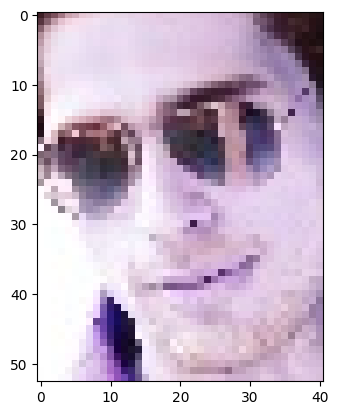

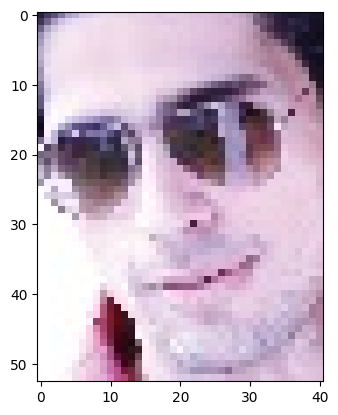

In [114]:
detector = MTCNN()

# loading sample image -> croping the face using opencv and detect the face (since we only need the face)
test_img_path = '/content/sample/Sidharth_Malhotra.170.jpg'
sample_img = cv2.imread (test_img_path)
result = detector.detect_faces(sample_img)
if len(result) > 0:
    x,y,width,height = result[0]['box']

    face = sample_img[y:y+height, x:x+width]

    # cv2.imshow('output', face); cv2.waitkey(0)
    # since cv2.imshow() is disabled in google colab we need to use matplotlib to show the image

    from matplotlib import pyplot as plt
    plt.imshow (face); plt.show()

    # the img is not as expected since opencv shows BGR instead of RGB so we need to do that manually
    plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB)); plt.show()
else:
    face = result
    plt.imshow(face); plt.show()

FEATURE EXTRACTION FROM SAMPLE IMAGE

In [115]:
image = Image.fromarray(face)
image = image.resize((224,224))
face_arr = np.asarray(image); face_arr.astype('float32')
expanded_img = np.expand_dims(face_arr, axis=0)

preprocessed_img= preprocess_input(expanded_img)

result = model.predict(preprocessed_img).flatten()

print(result, result.shape)

1/1 [==============================] - 0s 22ms/step
[0.38382122 0.49859738 0.0334877  ... 0.03632693 0.         0.39413655] (2048,)


COMPARING THE EXTRACTED FEATURES WITH PRE-TRAINED FEATURES DATASET

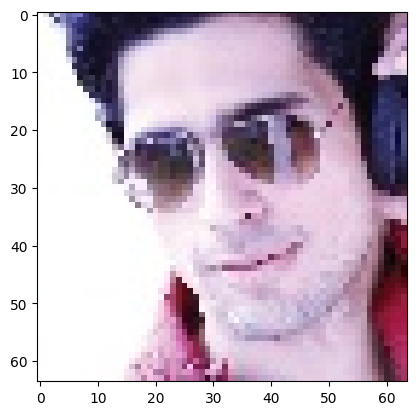

In [116]:
# now this result vector must be compared with vectors in feature_list i.e., we are comparing the features_extracted from the sample image with trained images to find the closest possible prediction

similarity = list()
for i in range(len(feature_list)):
    similarity.append(cosine_similarity(result.reshape(1,-1), feature_list[i].reshape(1,-1))[0][0])

index_pos = sorted(list(enumerate(similarity)), reverse=True, key=lambda x:x[1])[0][0]

prediction = cv2.imread(filenames[index_pos])
plt.imshow(cv2.cvtColor(prediction, cv2.COLOR_BGR2RGB)); plt.show()